In [99]:
#from biozorromodel import BioZorro
from datasets import load_from_disk
from encoders import BioZorroCollator

In [212]:
#lm_datasets = load_from_disk('data/filtered_protein_mrna_genes')
#lm_datasets = load_from_disk('/efs-private/single_cell_data/out_veloc_data_unfiltered') #Just filtered Velocity
lm_datasets = load_from_disk('/shared/fcaa53cd-ba57-4bfe-af9c-eaa958f95c1a_combined_all')

In [213]:
lm_datasets = lm_datasets.rename_column('total_index','expression_index')
lm_datasets = lm_datasets.rename_column('total_data','expression_data')


ValueError: Original column name total_index not in the dataset. Current columns in the dataset: ['spliced_index', 'spliced_counts', 'unspliced_index', 'unspliced_counts', 'expression_index', 'expression_counts', 'CellID', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts']

In [16]:
import numpy as np
from tqdm import tqdm
from collections import defaultdict
mins = defaultdict(list)
maxs = defaultdict(list)
length = defaultdict(list)
for sample in tqdm(lm_datasets):
    for k,v in sample.items():
        if "data" in k or "index" in k:
            try:
                mins[k].append(np.min(v))
                maxs[k].append(np.max(v))
                length[k].append(len(v))
            except:
                print(k)

  0%|▏                                            | 1478/396548 [00:01<08:15, 797.41it/s]

spliced_index
spliced_data


  5%|██                                          | 18922/396548 [00:22<11:36, 542.14it/s]

unspliced_index
unspliced_data
expression_index
expression_data


  5%|██▏                                         | 19815/396548 [00:24<11:26, 548.98it/s]

unspliced_index
unspliced_data
expression_index
expression_data


  5%|██▏                                         | 20253/396548 [00:25<11:43, 535.21it/s]

unspliced_index
unspliced_data
expression_index
expression_data


  5%|██▎                                         | 20806/396548 [00:26<11:10, 560.66it/s]

unspliced_index
unspliced_data
expression_index
expression_data


  5%|██▎                                         | 21041/396548 [00:26<10:58, 570.28it/s]

unspliced_index
unspliced_data
expression_index
expression_data


  6%|██▍                                         | 22284/396548 [00:28<08:44, 713.85it/s]

unspliced_index
unspliced_data
expression_index
expression_data


 11%|████▊                                       | 43117/396548 [00:54<08:16, 711.55it/s]

unspliced_index
unspliced_data
expression_index
expression_data


 11%|████▉                                       | 44973/396548 [00:57<08:42, 673.30it/s]

unspliced_index
unspliced_data
expression_index
expression_data


 12%|█████▎                                      | 47905/396548 [01:01<08:26, 687.82it/s]

unspliced_index
unspliced_data
expression_index
expression_data


 12%|█████▎                                      | 48313/396548 [01:02<08:43, 665.16it/s]

unspliced_index
unspliced_data
expression_index
expression_data


 15%|██████▊                                     | 61133/396548 [01:15<05:42, 980.00it/s]

unspliced_index
unspliced_data
expression_index
expression_data


 18%|███████▉                                    | 71549/396548 [01:40<07:34, 714.44it/s]


KeyboardInterrupt: 

In [43]:
import numpy as np
from tqdm import tqdm
from collections import defaultdict
data_points = defaultdict(list)
for sample in tqdm(lm_datasets):
    for d, idx in zip(sample['velocity_data'],sample['velocity_index']):
        data_points[idx].append(d)

100%|█████████████████| 396548/396548 [08:12<00:00, 805.50it/s]


In [ ]:
data_var= np.zeros(2000)
for idx, d in data_points.items():
    data_var[idx] = np.var(d)

Text(0, 0.5, 'Counts of Genes With Variance')

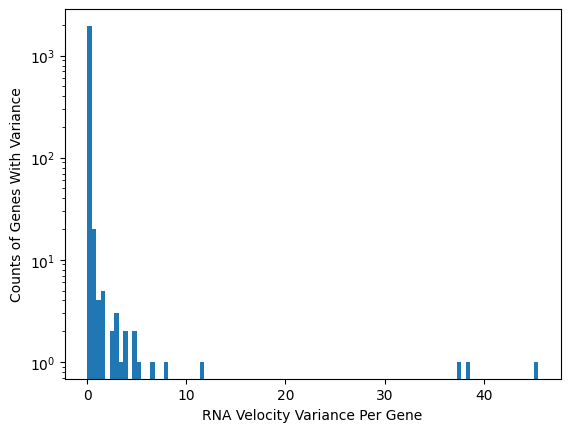

In [75]:
plt.hist(data_var, bins=100)
plt.yscale('log')
hv = np.nonzero(data_var > 1)[0]
plt.xlabel("RNA Velocity Variance Per Gene")
plt.ylabel("Counts of Genes With Variance")

217136
122619
331610
394109
188372
196429
154936
190851
161166
197904
161351
193780
65066
85110
60503
59581
68717
72115
65888
78666
65689
71401
64234
63128
73383
[ 209  265  286  347  369  503  749 1037 1047 1410 1519 1524 1751 1752
 1753 1754 1756 1758 1760 1767 1779 1781 1783 1784 1791]


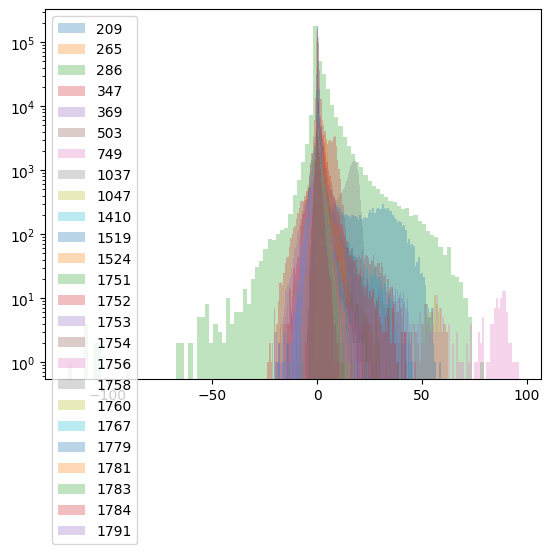

In [69]:
for idx in hv:
    #print(len(data_points[idx]))
    plt.hist(data_points[idx], bins=100, alpha=0.3)
plt.legend(hv)
plt.yscale('log')
print(hv)

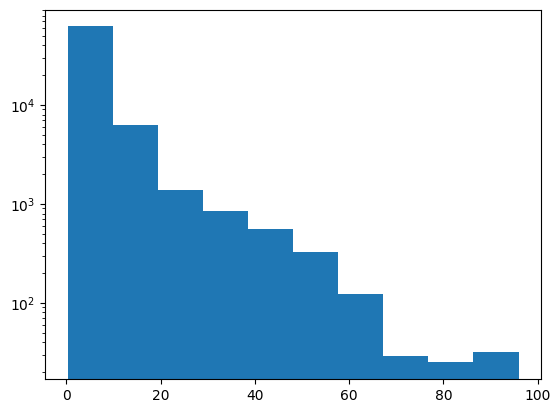

In [41]:
import matplotlib.pyplot as plt
plt.hist(maxs['velocity_data'])
plt.yscale('log')

In [73]:
[print(f"{x},") for x in hv]

209,
265,
286,
347,
369,
503,
749,
1037,
1047,
1410,
1519,
1524,
1751,
1752,
1753,
1754,
1756,
1758,
1760,
1767,
1779,
1781,
1783,
1784,
1791,


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [16]:
#keep =  ['spliced_index', 'unspliced_index', 'spliced_data', 'unspliced_data']
keep = ['expression_index','expression_data','spliced_index', 'unspliced_index', 'spliced_data', 'unspliced_data']
remove = list()
for key in lm_datasets.features.keys():
    if key not in keep:
        remove.append(key)
lm_datasets = lm_datasets.remove_columns(remove)

In [17]:
from torch.utils.data import DataLoader
default_data_collator = BioZorroCollator(pad_len=2048, pad_token=0)
dataloader = DataLoader(lm_datasets.with_format('torch'), shuffle=True, collate_fn=default_data_collator, batch_size=4,)

In [18]:
dl = iter(dataloader)
batch = next(dl)

In [57]:
#https://ai.stackexchange.com/questions/28564/how-to-determine-the-embedding-size
import numpy as np
vocab_size = 18817
num_embeddings = int(75.6496 * np.log(vocab_size + 176.623) - 41.4457)
print(num_embeddings)

703


In [74]:
2.5*10**5*256/8

8000000.0

In [62]:
config = {
    "dim": num_embeddings, #hidden size
    "depth": 3, #layers
    "spliced_input_dim": num_embeddings, #embedding_size
    "unspliced_input_dim": num_embeddings,
    "dim_head":64, #don't know, head hidden size?
    "heads": 4, #num heads
    "ff_mult": 4, #Feed forward multiplier
    "num_fusion_tokens": 16,
    "vocab_size": vocab_size
}

model = BioZorro(**config)

In [63]:
for n,p in model.named_parameters():
    if p.requires_grad:
        print(f"{n}:{p.numel()/10**6}")

return_tokens:0.002109
fusion_tokens:0.011248
loss.contrastive_loss.logit_scale:1e-06
attn_pool.norm.gamma:0.000703
attn_pool.to_q.weight:0.179968
attn_pool.to_kv.weight:0.359936
attn_pool.to_out.weight:0.179968
spliced_embedding.gene_encoder.embedding.weight:13.228351
spliced_embedding.gene_encoder.enc_norm.weight:0.000703
spliced_embedding.gene_encoder.enc_norm.bias:0.000703
spliced_embedding.counts_encoder.linear1.weight:0.000703
spliced_embedding.counts_encoder.linear1.bias:0.000703
spliced_embedding.counts_encoder.linear2.weight:0.494209
spliced_embedding.counts_encoder.linear2.bias:0.000703
spliced_embedding.counts_encoder.norm.weight:0.000703
spliced_embedding.counts_encoder.norm.bias:0.000703
unspliced_embedding.gene_encoder.embedding.weight:13.228351
unspliced_embedding.gene_encoder.enc_norm.weight:0.000703
unspliced_embedding.gene_encoder.enc_norm.bias:0.000703
unspliced_embedding.counts_encoder.linear1.weight:0.000703
unspliced_embedding.counts_encoder.linear1.bias:0.000703


In [61]:
outputs = model(**batch)

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 703 but got size 128 for tensor number 1 in the list.

In [41]:
outputs

BioZorroPretrainingLossOutput(losses=BioZorroPretrainingLossesCollection(contrastive_loss=tensor(10.3229, grad_fn=<DivBackward0>), fusion_loss_spliced=tensor(2.3723, grad_fn=<DivBackward0>), fusion_loss_unspliced=tensor(3.2532, grad_fn=<DivBackward0>)), spliced_output=None, unspliced_output=None, fusion_output=None)

In [ ]:
outputs.loss.backward()

In [ ]:
import wandb
wandb.init()

In [ ]:
from torch.optim import AdamW
from tqdm import tqdm

epochs=100
optimizer = AdamW(model.parameters(), lr=0.0001)
num_training_steps = epochs * len(dataloader)
progress_bar = tqdm(range(num_training_steps))

#print("Start training: {}".format(strftime("%Y-%m-%d %H:%M:%S", gmtime())))
## Start model training and defining the training loop
model.train()
for epoch in range(epochs):
    for batch in dataloader:
        #batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        optimizer.zero_grad()
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        progress_bar.update(1)
        wandb.log({"loss":loss.detach().to("cpu")})
    print(f"Epoch {epoch}: loss: {loss.detach()}")
        #
    #if xm.is_master_ordinal(local=False):
    wandb.log({"epoch_loss":loss.detach().to("cpu")})

logger.info("End training: {}".format(strftime("%Y-%m-%d %H:%M:%S", gmtime())))

In [17]:
from collections import defaultdict
import torch
losses = defaultdict(lambda: torch.Tensor([0.0]).to("cpu"))
losses['test']+=torch.Tensor([1.0])

# Scaling law results

In [5]:
import pandas as pd
import numpy as np
nparam = np.array([76.65,38.81,32.5, 26.23,
                   19.94,13.64,10.50,7.35])*10**6
nlayers = np.array([24,16,10,8,6,4,3,2])
sm_loss = { 'fusion_spliced': [0.05217,0.055660,0.05406000, 0.04967,
                               0.0688, 0.0625,0.06375,0.07791],
           'fusion_unspliced':[0.05201,0.055482,0.05395645, 0.04972,
                               0.06859,0.0624,0.06347,0.07738],
           'contrastive_loss':[0.051933,0.05556,0.054283, 0.0499,
                               0.06961,0.0638,0.06341,0.07857]
}
dm_loss = { 'fusion_spliced':[0.002226,0.004596, 0.0047380,0.003942,
                              0.005551,0.005522,0.005401,0.01271],
           'fusion_unspliced':[0.002172,0.0046209,0.0047747,0.004004,
                               0.005403,0.005479,0.005485,0.01249],
           'contrastive_loss':[0.002259,0.004727,0.0048772,0.00414,
                               0.005551,0.005278,0.005551,0.01522]
}

dm_loss=np.array(list(dm_loss.values()))
dm_loss = dm_loss.sum(axis=0)
#dm_loss=dm_loss[:,:-1].sum(axis=0)
sm_loss=np.array(list(sm_loss.values()))
sm_loss = sm_loss.sum(axis=0)
#sm_loss=sm_loss[:,:-1].sum(axis=0)
#nparam=nparam[:-1]
df = pd.DataFrame.from_dict({'dual':dm_loss,
                             'single':sm_loss,
                             'param':nparam})
df_m = pd.DataFrame.from_dict({'dual':dm_loss/dm_loss.mean(),
                               'single':sm_loss/sm_loss.mean(),
                               'param':nparam})
df.to_csv('prelim_scale_data.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/shared/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f33337f34d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  
/shared/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x7f33317b8550> has a label of '_nolegend_' which cannot be automatically added to the legend.
  
/shared/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f33317b8c10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  
/shared/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f33317379d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
/shared/miniconda3/lib/pyth

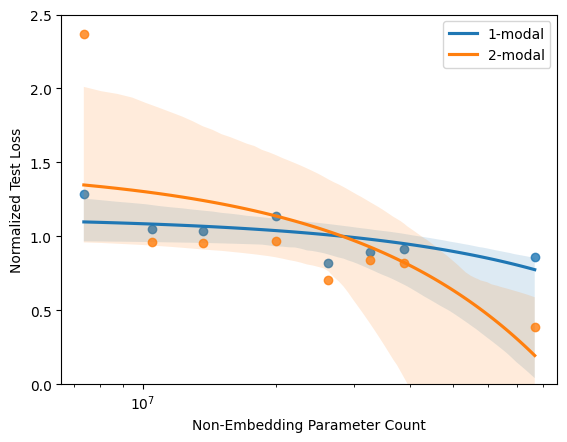

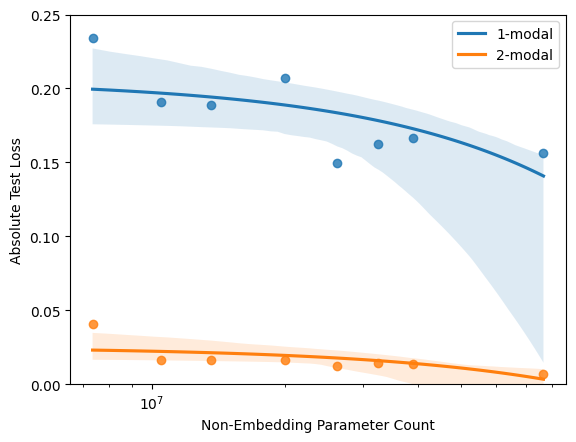

In [4]:
sm_loss_ = sm_loss
dm_loss_ = dm_loss
nparam_ = nparam
nlayers_ = nlayers
plt.clf()
plt.figure(1)
#plt.plot(nparam_,np.array(sm_loss_)/sm_loss_.mean(),'o-',
#         nparam_,np.array(dm_loss_)/dm_loss_.mean(),'x-')
sns.regplot(df_m, x='param',y='single')
sns.regplot(df_m, x='param',y='dual')
plt.xscale('log')
#plt.xlim([9*10**6,10**8])
plt.ylim([0,2.5])
plt.xlabel('Non-Embedding Parameter Count')
plt.ylabel('Normalized Test Loss')
plt.legend(['_nolegend_',"1-modal",'_nolegend_','_nolegend_',"2-modal"]) 
plt.figure(2)
#plt.plot(nparam_,np.array(sm_loss_),'o-',
#         nparam_,np.array(dm_loss_),'x-')
sns.regplot(df, x='param',y='single')
sns.regplot(df, x='param',y='dual')
plt.xscale('log')
plt.ylim([0,0.25])

#plt.xlim([5*10**6,10**8])
plt.xlabel('Non-Embedding Parameter Count')
plt.ylabel('Absolute Test Loss')
plt.legend(['_nolegend_',"1-modal",'_nolegend_','_nolegend_',"2-modal"]) 
#, "1-modal", "2-modal"])

# Other TEsts

In [1]:
# Get some indices in the top rankings
#indices = [x[0:5] for x in dataset3[0:10000]['velocity_index']]
#indices = [x for y in indices for x in y]

In [236]:
unique, counts = np.unique(indices, return_counts=True)
arrinds = counts.argsort()
unique = unique[arrinds]
counts = counts[arrinds]

In [6]:
print(counts[-5:])
print(unique[-5:]) #indices to use
target_ids = unique[-5:]

NameError: name 'counts' is not defined

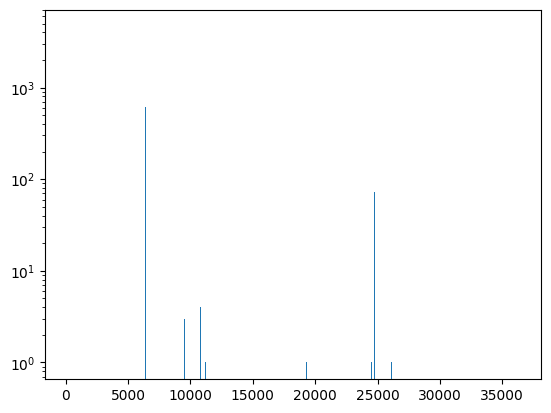

In [230]:
import matplotlib.pyplot as plt
plt.bar(unique,counts)
plt.yscale('log')
#plt.hist(indices, bins=36601)

In [265]:
vel_index = torch.tensor(dataset3[0]['velocity_index']) 
vel_val = torch.tensor(dataset3[0]['velocity_data']) 

idx = vel_index == 9999999 #target_ids[0]
x=vel_val[idx]
y = x.item() if x.nelement() != 0 else 0.0
y

0.0

# Testing Pretrained Model

In [1]:
from safetensors.torch import load_model
import json
import os
import torch

In [2]:
import datasets
!ls /shared/

/shared/miniconda3/envs/stp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ad98d3cd-26fb-4ee3-99c9-8a2ab085e737_combined_all
cc95ff89-2e68-4a08-a234-480eca21ce79_combined_all
fcaa53cd-ba57-4bfe-af9c-eaa958f95c1a_combined_all
fcaa53cd-ba57-4bfe-af9c-eaa958f95c1a_combined_all_veloc_sparse
fde199d2-a841-4ed1-aa65-b9e0af8969b1_combined_all
genecorpus_30M_10p_2048.dataset
genecorpus_30M_1p_2048.dataset
genecorpus_30M_2048.dataset
lost+found
miniconda3
neuron_cache
tmp


In [38]:
from multizorromodel import BioZorro, BioZorroWithLeaveOneOut
from encoders import BioZorroCollator
from velocitymodel import VelocityModel
import datasets
from torch.utils.data import DataLoader
from encoders import BioZorroCollatorWithTargets
#!ls training_output_17_52_26_10_2023
#output_dir = "training_output_22_45_26_10_2023" #Velocity fine tuned
output_dir = "training_output_23_45_06_11_2023" #Pretrained 3 epoch 300k

In [8]:
!cat training_output_22_47_25_10_2023/config.yaml

batch_size: 4
dataset: /shared/fcaa53cd-ba57-4bfe-af9c-eaa958f95c1a_combined_all
dim_head: 64
ds_frac: 1
ds_seed: 42
epochs: 3
ff_mult: 4
heads: 4
hidden_size: 256
layers: 5
lr: 0.0001
lr_scheduler_type: cosine
model: 3
n_params_emb: 28310016
n_params_nonemb: 4200193
num_fusion_tokens: 16
num_warmup_steps: 3000
output_dir: training_output_22_47_25_10_2023
restart: false



In [39]:
from datasets import load_from_disk
#dataset = datasets.load_from_disk(config['dataset'])
#dataset2 = datasets.load_from_disk('/shared/fde199d2-a841-4ed1-aa65-b9e0af8969b1_combined_all')
dataset3 = load_from_disk('/shared/fcaa53cd-ba57-4bfe-af9c-eaa958f95c1a_combined_all') #_all_veloc_sparse')
for col in dataset3.features:
    if 'counts' in col:
        col = col.split('_')[0]
        dataset3 = dataset3.rename_column(f'{col}_counts',f'{col}_data')
#lm_datasets = lm_datasets.rename_column('total_data','expression_data')

In [41]:
import yaml
import os
with open(os.path.join(output_dir,'config.yaml'), 'r') as file:
    config = yaml.safe_load(file)
print(config)

{'batch_size': 2, 'dataset': '/shared/fcaa53cd-ba57-4bfe-af9c-eaa958f95c1a_combined_all', 'dim_head': 8, 'ds_frac': 1.0, 'ds_seed': 42, 'epochs': 4, 'ff_mult': 4, 'heads': 8, 'hidden_size': 512, 'layers': 5, 'lr': 0.0001, 'lr_scheduler_type': 'cosine', 'model': 3, 'num_fusion_tokens': 64, 'num_warmup_steps': 3000, 'split': 0.1, 'run_eval_loop': False}


In [42]:
#with open(os.path.join(output_dir,'model_config.json'),'r') as f:
#    model_config = json.load(f)
#print(model_config)
model_config = {'dim': 512, 'depth': 5, 'dim_head': 8, 'heads': 8, 'ff_mult': 4, 'num_fusion_tokens': 64, 'vocab_size': 36602}

In [43]:
#keep =  ['spliced_index', 'unspliced_index', 'spliced_data', 'unspliced_data']
#keep = ['expression_index','expression_counts','spliced_index', 'unspliced_index', 'spliced_counts', 'unspliced_counts']
keep = ['velocity_index','velocity_data','expression_index',
        'expression_data','spliced_index', 'unspliced_index',
        'spliced_data', 'unspliced_data']

remove = list()
for key in dataset3.features.keys():
    if key not in keep:
        remove.append(key)
#dataset = dataset.remove_columns(remove)
#dataset2 = dataset2.remove_columns(remove)
dataset3 = dataset3.remove_columns(remove)
dataset3 = dataset3.train_test_split(0.1, seed=42)
dataset3

Loading cached split indices for dataset at /shared/fcaa53cd-ba57-4bfe-af9c-eaa958f95c1a_combined_all/cache-7108baa4d780fe0f.arrow and /shared/fcaa53cd-ba57-4bfe-af9c-eaa958f95c1a_combined_all/cache-52710f13f0bd35fa.arrow


DatasetDict({
    train: Dataset({
        features: ['spliced_index', 'spliced_data', 'unspliced_index', 'unspliced_data', 'expression_index', 'expression_data'],
        num_rows: 360283
    })
    test: Dataset({
        features: ['spliced_index', 'spliced_data', 'unspliced_index', 'unspliced_data', 'expression_index', 'expression_data'],
        num_rows: 40032
    })
})

In [44]:
default_data_collator = BioZorroCollator(pad_len=1024, pad_token=0)
#default_data_collator = BioZorroCollatorWithTargets(pad_len=1024, pad_token=0, 
#                                                    target_ids=[ 5717, 33042, 21509, 27559, 33027],
#                                                    norm=[0.2,0.5])

#dataloader2 = DataLoader(dataset.with_format('torch'), shuffle=True, collate_fn=default_data_collator, batch_size=4,)
dataloader3 = DataLoader(dataset3['test'].with_format('torch'), shuffle=True, collate_fn=default_data_collator, batch_size=4,)

In [45]:
#dl=iter(dataloader)
#dl=iter(dataloader2)
dl = iter(dataloader3)
batch = next(dl)
#batch2= next(dl2):q

for k,v in batch.items():
    print(f"{k} {v.shape}")
    
print(len(dataloader3))

spliced_index torch.Size([4, 1024])
spliced_data torch.Size([4, 1024])
unspliced_index torch.Size([4, 1024])
unspliced_data torch.Size([4, 1024])
expression_index torch.Size([4, 1024])
expression_data torch.Size([4, 1024])
10008


In [15]:
batch['velocity'].shape
print(batch['velocity'])

KeyError: 'velocity'

In [46]:
model = BioZorroWithLeaveOneOut(**model_config)
model.eval()
with torch.no_grad():
    output1 = model(**{k:v for k,v in batch.items() if 'velocity' not in k})
print(model)

BioZorroWithLeaveOneOut(
  (loss): BioZorroPretrainingLossFLOOM(
    (contrastive_loss_spliced_unspliced): ContrastiveLossWithTemperature()
    (contrastive_loss_spliced_expression): ContrastiveLossWithTemperature()
    (contrastive_loss_unspliced_expression): ContrastiveLossWithTemperature()
    (fusion_loss_spliced): ContrastiveLossWithTemperature()
    (fusion_loss_unspliced): ContrastiveLossWithTemperature()
    (fusion_loss_expression): ContrastiveLossWithTemperature()
    (fusion_loss_invariance): MSELoss()
  )
  (attn_pool): Attention(
    (norm): LayerNorm()
    (to_q): Linear(in_features=512, out_features=64, bias=False)
    (to_kv): Linear(in_features=512, out_features=128, bias=False)
    (to_out): Linear(in_features=64, out_features=512, bias=False)
  )
  (spliced_embedding): BioZorroEncoder(
    (gene_encoder): GeneEncoder(
      (embedding): Embedding(36602, 512, padding_idx=0, max_norm=1.0)
    )
    (counts_encoder): ContinuousValueEncoder(
      (dropout): Dropout(p=0.

In [106]:
velocitymodel=VelocityModel(backbone_model=model, decoder_num_layers=0,
                            layers_to_unfreeze=[],
                            backbone_hidden_size = model_config['dim']*4, 
                            output_size = 5)

return_tokens:False
fusion_tokens:False
loss.contrastive_loss_spliced_unspliced.logit_scale:False
attn_pool.norm.gamma:False
attn_pool.to_q.weight:False
attn_pool.to_kv.weight:False
attn_pool.to_out.weight:False
spliced_embedding.gene_encoder.embedding.weight:False
spliced_embedding.counts_encoder.linear1.weight:False
spliced_embedding.counts_encoder.linear1.bias:False
spliced_embedding.counts_encoder.linear2.weight:False
spliced_embedding.counts_encoder.linear2.bias:False
spliced_embedding.counts_encoder.norm.weight:False
spliced_embedding.counts_encoder.norm.bias:False
unspliced_embedding.gene_encoder.embedding.weight:False
unspliced_embedding.counts_encoder.linear1.weight:False
unspliced_embedding.counts_encoder.linear1.bias:False
unspliced_embedding.counts_encoder.linear2.weight:False
unspliced_embedding.counts_encoder.linear2.bias:False
unspliced_embedding.counts_encoder.norm.weight:False
unspliced_embedding.counts_encoder.norm.bias:False
expression_embedding.gene_encoder.embeddin

In [47]:
import torch
#load_model(model,os.path.join(output_dir,'model.safetensors'))
checkpoint_path = os.path.join(output_dir, '2')
checkpoint = torch.load(os.path.join(checkpoint_path, 'pytorch_model.bin'), map_location="cpu")
#print(checkpoint)
#velocitymodel.load_state_dict(checkpoint)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [48]:
def zero_modes(batch, modes_to_zero):
    for mode in modes_to_zero:
        batch[mode]=batch[mode]*0
    return batch

In [49]:
from tqdm import tqdm
output=[]
output_zero=[]
output_1zero=[]
veloc=[]
#infer_model = velocitymodel.eval()
infer_model = model.eval()
with torch.no_grad():
    for i in tqdm(range(100)):
        #batch = next(dl)
        #batch2 = next(dl2)
        batch = next(dl)
        batch = {k:v for k,v in batch.items() if 'velocity' not in k}
        #output.append(model(**batch))
        #output2.append(model(**batch2))
        out = infer_model(**batch)
        out_1zeroed = infer_model(**zero_modes(batch,[#'spliced_index',
                                 #'spliced_data',
                                 'unspliced_index',
                                 'unspliced_data']), 
                )#return_logit=True)
        out_zeroed = infer_model(**zero_modes(batch,['spliced_index',
                                                 'spliced_data',
                                                 'unspliced_index',
                                                 'unspliced_data']), 
                                )#return_logit=True)
        #veloc.append(batch['velocity'])
        output.append(out)
        output_zero.append(out_zeroed)
        output_1zero.append(out_1zeroed)
#print(output)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [21:09<00:00, 12.70s/it]


In [56]:
output

{'spliced': tensor([[-0.3608, -0.9463, -0.0705,  ..., -2.0214,  1.3911, -1.3152],
         [-0.3519, -0.9257, -0.1568,  ..., -1.9089,  1.4835, -1.3485],
         [-0.8043, -1.2138, -0.0250,  ..., -1.4650,  1.1411, -1.3001],
         ...,
         [-0.5270, -0.8325,  0.0547,  ..., -1.5536,  1.6651, -1.0713],
         [-0.6351, -1.1722,  0.1803,  ..., -1.5923,  1.4050, -1.3697],
         [-0.6212, -1.2441,  0.1286,  ..., -1.5468,  1.6003, -1.2399]]),
 'unspliced': tensor([[-0.6266,  0.0324, -0.5593,  ..., -0.5128,  0.9124, -1.6130],
         [-0.0575, -0.1480, -0.5698,  ..., -0.0731,  0.8860, -1.5204],
         [-0.8729, -0.8253,  0.1398,  ..., -0.0718,  0.3284, -1.2964],
         ...,
         [ 0.2571, -0.3546, -0.6575,  ...,  0.9533,  2.0811, -0.9610],
         [-0.8247, -0.7282,  0.2043,  ...,  0.1183,  1.0502, -1.3375],
         [-0.8769,  0.3268, -0.3606,  ...,  0.4102,  1.9391, -0.9719]]),
 'expression': tensor([[-0.6127,  0.0925, -0.6791,  ..., -0.5714,  0.0884,  0.9617],
       

In [51]:
def refactor(outputs):
    #print(outputs)
    #assert isinstance(outputs,list)
    out_dict = {k:[] for k in outputs[0] if 'loss' not in k}
    for batch in outputs:
        for key in out_dict.keys():
            out_dict[key].append(batch[key])
    out_dict = {k:torch.cat(v) for k,v in out_dict.items()}
    return out_dict

In [57]:
output_1zero = refactor(output_1zero)

KeyError: 0

In [58]:
output = refactor(output)
output_zero = refactor(output_zero)
print(output)

KeyError: 0

In [55]:
output

{'spliced': tensor([[-0.3608, -0.9463, -0.0705,  ..., -2.0214,  1.3911, -1.3152],
         [-0.3519, -0.9257, -0.1568,  ..., -1.9089,  1.4835, -1.3485],
         [-0.8043, -1.2138, -0.0250,  ..., -1.4650,  1.1411, -1.3001],
         ...,
         [-0.5270, -0.8325,  0.0547,  ..., -1.5536,  1.6651, -1.0713],
         [-0.6351, -1.1722,  0.1803,  ..., -1.5923,  1.4050, -1.3697],
         [-0.6212, -1.2441,  0.1286,  ..., -1.5468,  1.6003, -1.2399]]),
 'unspliced': tensor([[-0.6266,  0.0324, -0.5593,  ..., -0.5128,  0.9124, -1.6130],
         [-0.0575, -0.1480, -0.5698,  ..., -0.0731,  0.8860, -1.5204],
         [-0.8729, -0.8253,  0.1398,  ..., -0.0718,  0.3284, -1.2964],
         ...,
         [ 0.2571, -0.3546, -0.6575,  ...,  0.9533,  2.0811, -0.9610],
         [-0.8247, -0.7282,  0.2043,  ...,  0.1183,  1.0502, -1.3375],
         [-0.8769,  0.3268, -0.3606,  ...,  0.4102,  1.9391, -0.9719]]),
 'expression': tensor([[-0.6127,  0.0925, -0.6791,  ..., -0.5714,  0.0884,  0.9617],
       

In [54]:
def refactor_velocity(outputs):
    return torch.cat([x[2] for x in outputs])
output_val_cat = refactor_velocity(output)
veloc_val_cat = torch.cat(veloc)

TypeError: expected Tensor as element 0 in argument 0, but got str

Text(0.5, 1.0, 'RNA Velocity from 3 Pretraining + 1 fine Tuning Epoch\n with 1 unfrozen Pooling layer')

<Figure size 640x480 with 0 Axes>

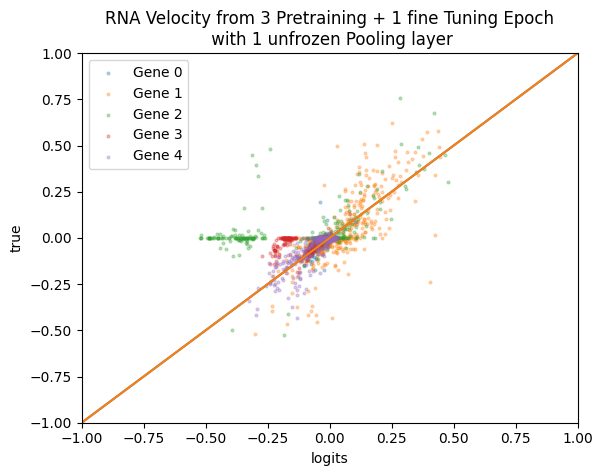

In [81]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(0)
for i in range(5):
    #plt.figure(i)
    plt.scatter(output_val_cat[:,i]-0.5,veloc_val_cat[:,i]-0.5,alpha=0.3, s=4)
    plt.xlabel('logits')
    plt.ylabel('true')
    plt.ylim(-1,1)
    plt.xlim(-1,1)
plt.plot(range(-1,2),range(-1,2))
plt.plot(range(-1,2),range(-1,2))
plt.legend(['Gene ' + str(i) for i in range(5)])
plt.title('RNA Velocity from 3 Pretraining + 1 fine Tuning Epoch\n with 1 unfrozen Pooling layer')
    #plt.figure(1)
    #plt.hist(veloc_cat.flatten())

Text(0.5, 1.0, 'RNA Velocity from 3 Pretraining + 1 fine Tuning Epoch\n with 1 unfrozen Pooling layer')

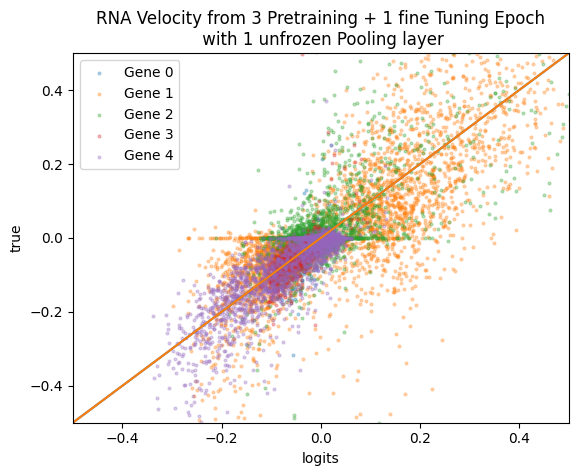

In [79]:
import matplotlib.pyplot as plt
plt.figure(0)
for i in range(5):
    #plt.figure(i)
    plt.scatter(output_cat[:,i]-0.5,veloc_cat[:,i]-0.5,alpha=0.3, s=4)
    plt.xlabel('logits')
    plt.ylabel('true')
    plt.ylim(-0.5,0.5)
    plt.xlim(-0.5,0.5)
plt.plot(range(-1,2),range(-1,2))
plt.plot(range(-1,2),range(-1,2))
plt.legend(['Gene ' + str(i) for i in range(5)])
plt.title('RNA Velocity from 3 Pretraining + 1 fine Tuning Epoch\n with 1 unfrozen Pooling layer')
    #plt.figure(1)
    #plt.hist(veloc_cat.flatten())

In [207]:
#print(output['spliced'][0][:10])
print(output2['spliced'][0][:10])

tensor([-0.4918, -0.4006,  0.0129, -0.1987,  0.6965,  0.6403, -0.1198, -2.3824,
        -0.2740, -0.5758])


In [35]:
import numpy as np
import matplotlib.pyplot as plt
def plot_cosines(output, output2=None, log=False, vmin=None, vmax=None, plot_diag=True):
    if not output2:
        output2 = output
    cos = torch.nn.CosineSimilarity(dim=0)
    mat_dict={}
    for k,v in output.items():
        l = v.shape[0]
        mat_dict[k]=np.zeros([l,l])
        v2 = output2[k]
        for i in range(l):
            for j in range(l):
                #print(f"{i},{j},{cos(output.fusion[i],output.fusion[j])}")
                if log:
                    mat_dict[k][i,j]=np.log10(cos(v[i],v2[j]))
                else:
                    mat_dict[k][i,j]=cos(v[i],v2[j])

    for k,mat in mat_dict.items():
        plt.figure()
        plt.title(k)
        plt.imshow(mat, vmin=vmin, vmax=vmax)
        plt.colorbar()
        if plot_diag:
            plt.figure()
            plt.title(f"{k} diagonals")
            bins = np.linspace(0,1.0,100)
            plt.hist(np.diagonal(mat), bins=bins, alpha=0.3,density=True)
            plt.hist(mat.flatten(), bins=bins, alpha=0.3, density=True)
            plt.ylim(0,50)
            plt.xlim(0.75,1.0)
            plt.legend(["diag","all"])
    #if plot_diag:
        """
        plt.figure()
        plt.title("diagonals")
        diags = {k:np.diagonal(mat) for k,mat in mat_dict.items()}
        plt.hist(diags.values(), bins=20)
        plt.legend(diags.keys())
        plt.ylabel('Number of Batches')
        plt.xlabel('Diag Cosine Similarity')
        plt.figure()
        plt.title("diagonals")
        diags = {k:np.diagonal(mat) for k,mat in mat_dict.items()}
        diags_norm = {k:np.diagonal(mat)-np.mean(mat_dict[k]) for k, mat in mat_dict.items()}
        plt.hist(diags_norm.values(), bins=20)
        plt.legend(diags_norm.keys())
        plt.ylabel('Number of Batches')
        plt.xlabel('%Cosine Similarity Change from Mean of Diagonal')
        diags = {k:np.diagonal(mat) for k,mat in mat_dict.items()}
        diags_norm = {k:np.diagonal(mat)-np.mean(mat_dict[k]) for k, mat in mat_dict.items()}
        plt.hist(diags_norm.values(), bins=20)
        plt.legend(diags_norm.keys())
        plt.ylabel('Number of Batches')
        plt.xlabel('%Cosine Similarity Change from Mean of Diagonal')        
        """
        #plt.figure()
        #plt.title("")

        

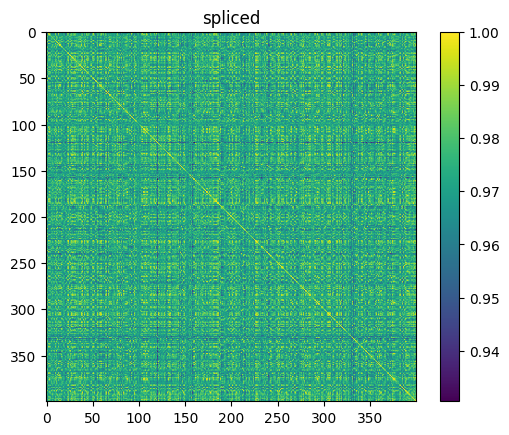

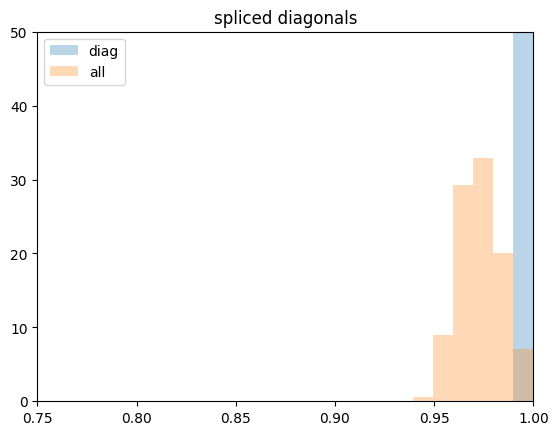

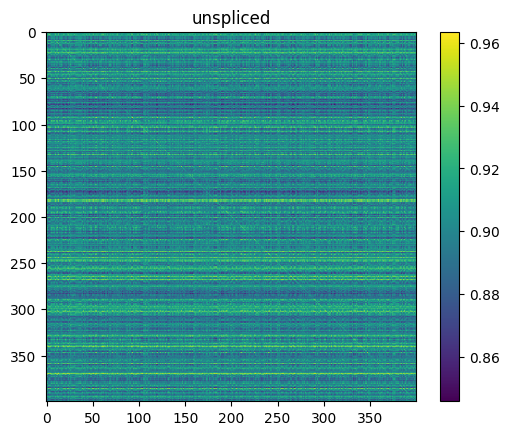

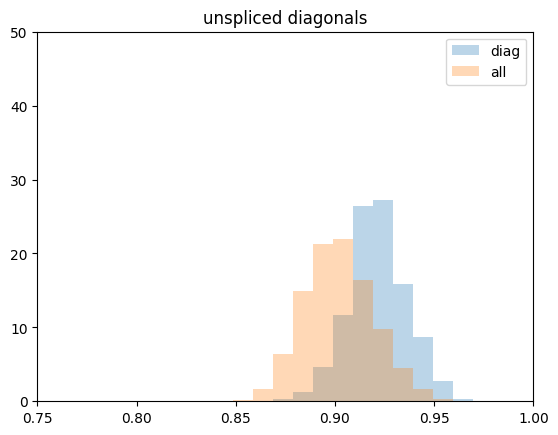

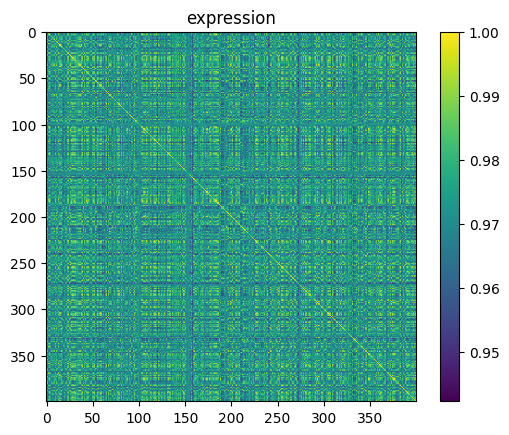

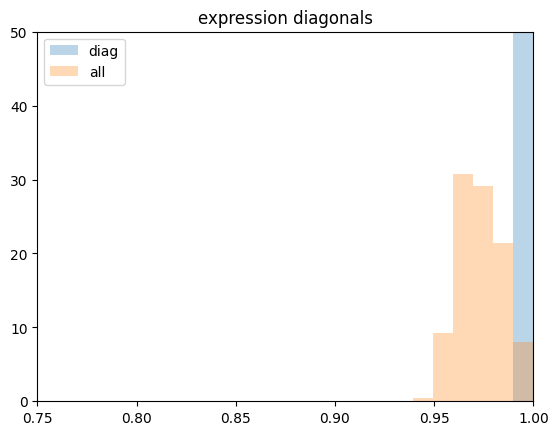

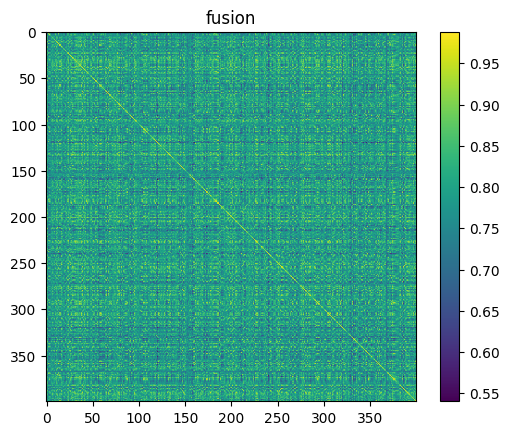

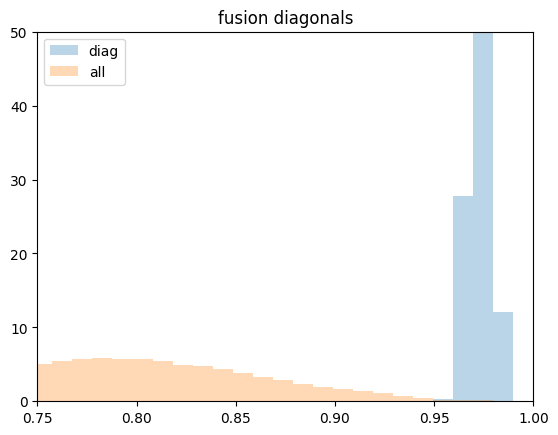

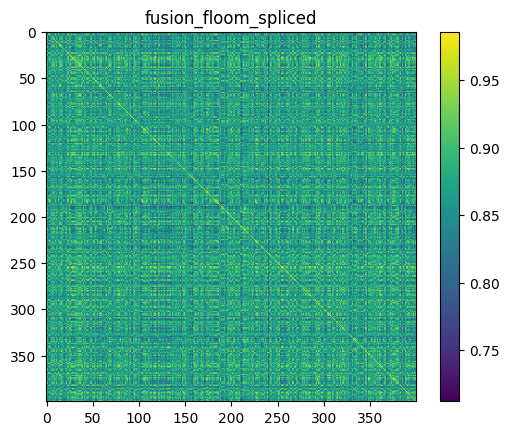

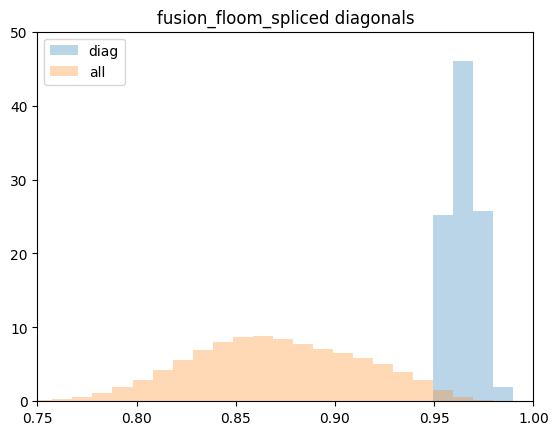

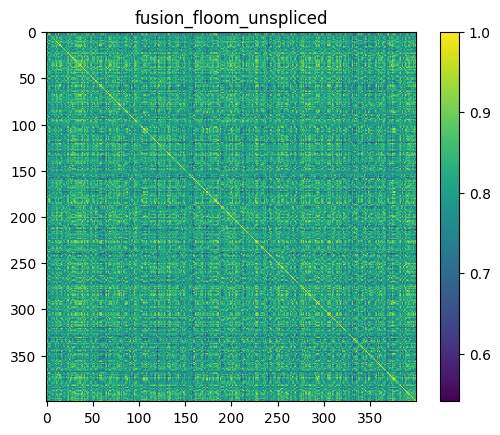

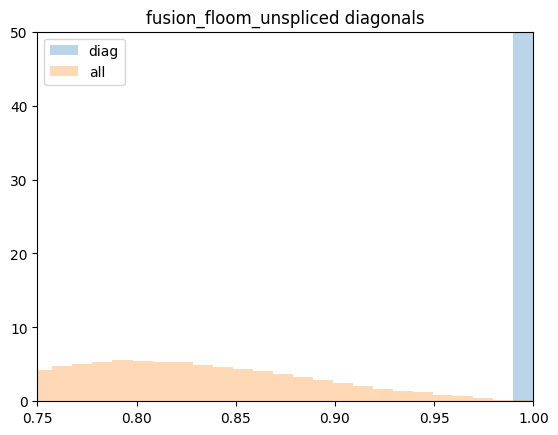

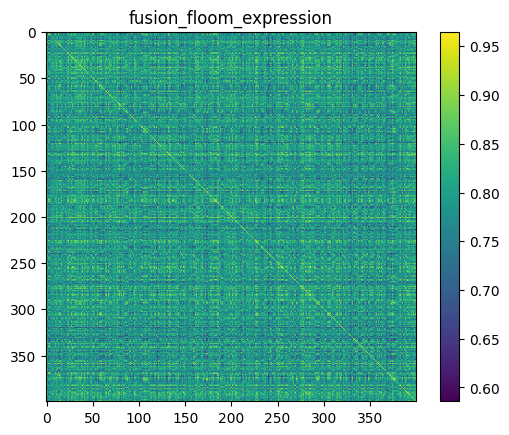

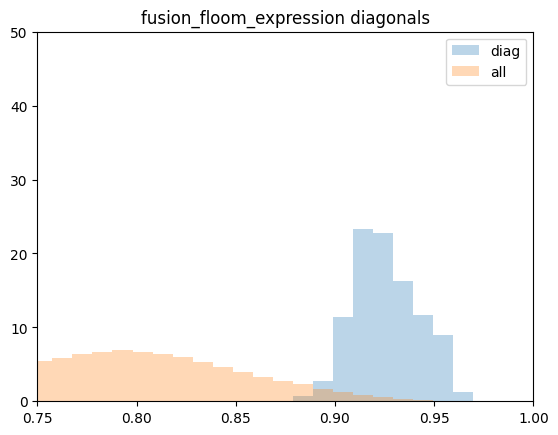

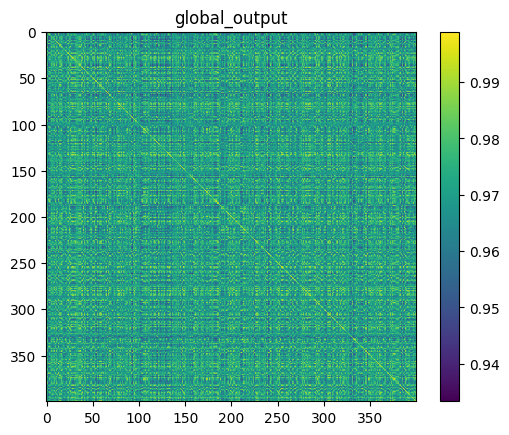

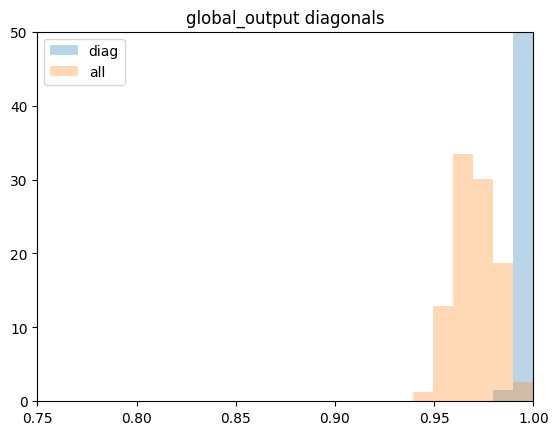

In [59]:
plot_cosines(output,  output_1zero)#,vmin=0.75)

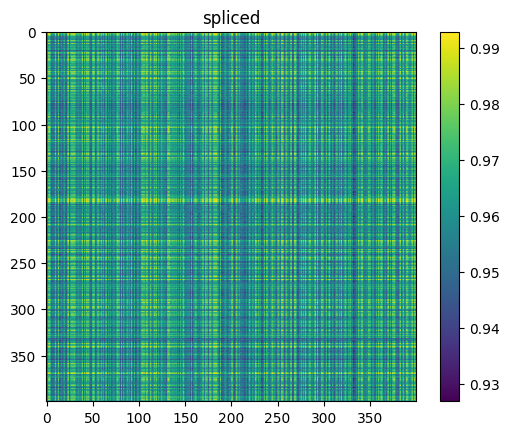

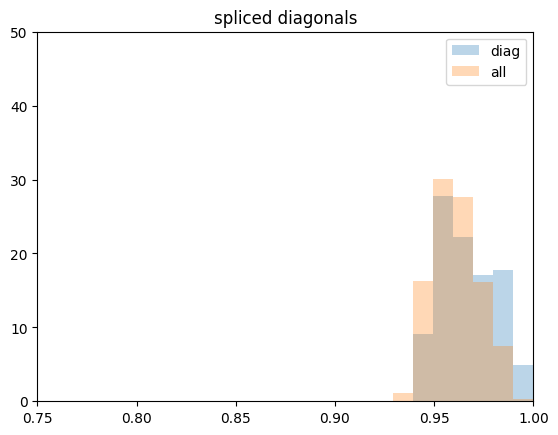

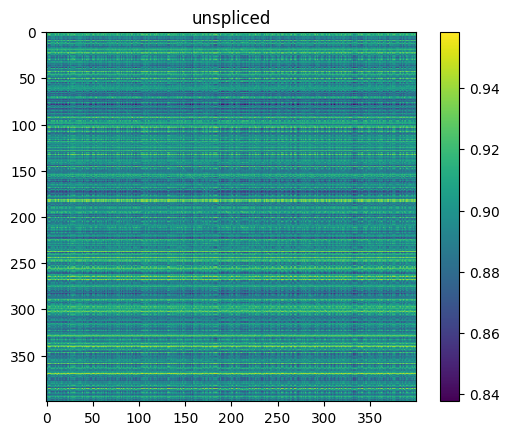

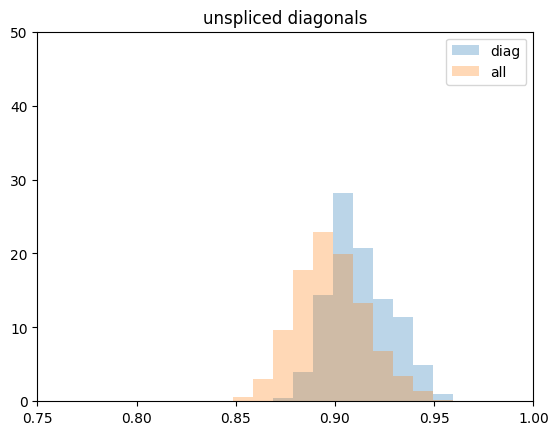

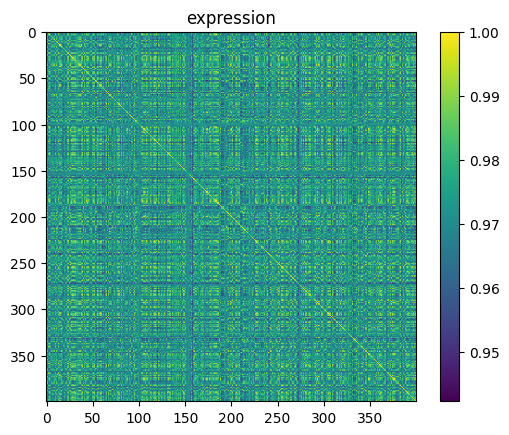

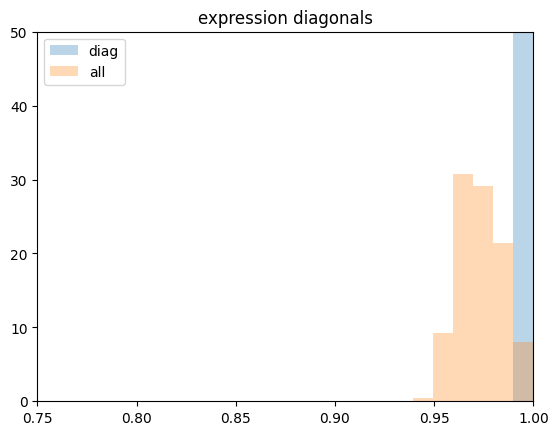

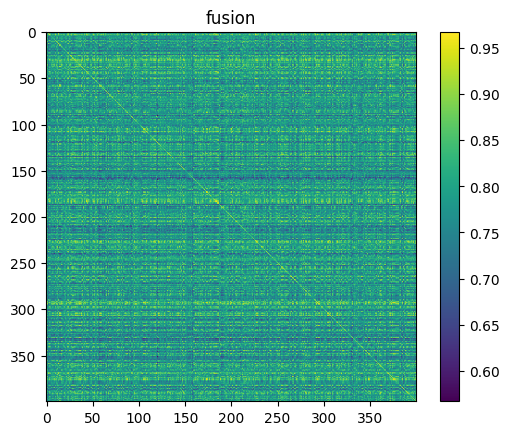

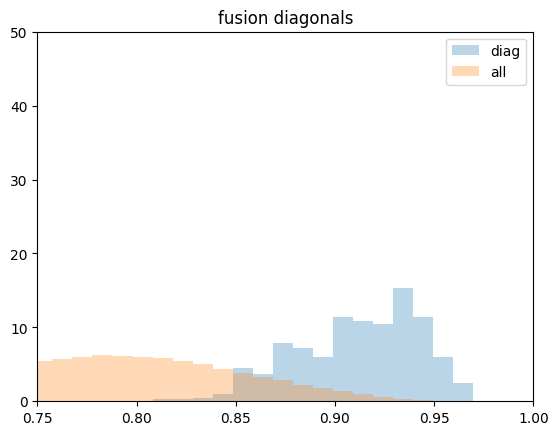

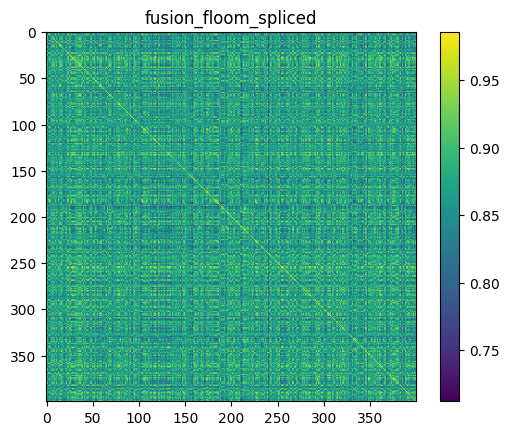

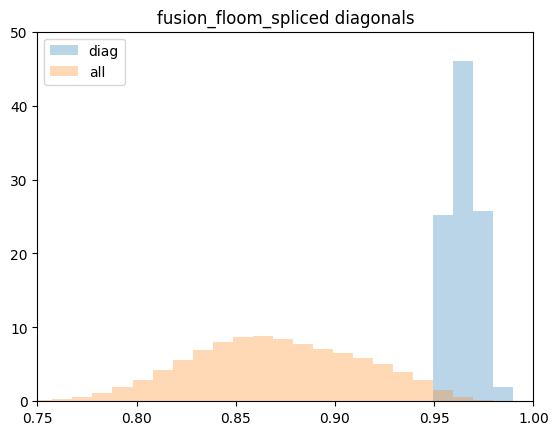

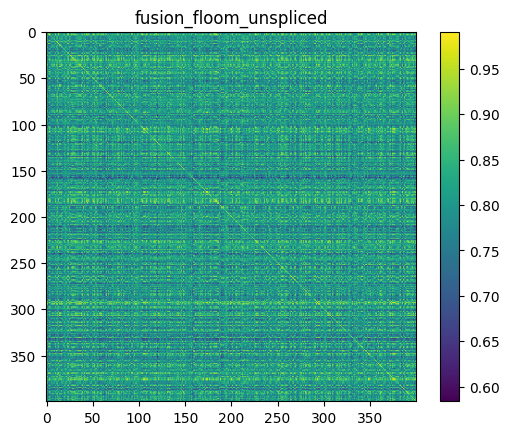

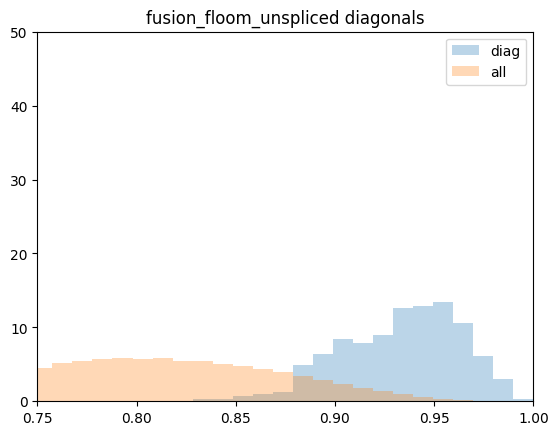

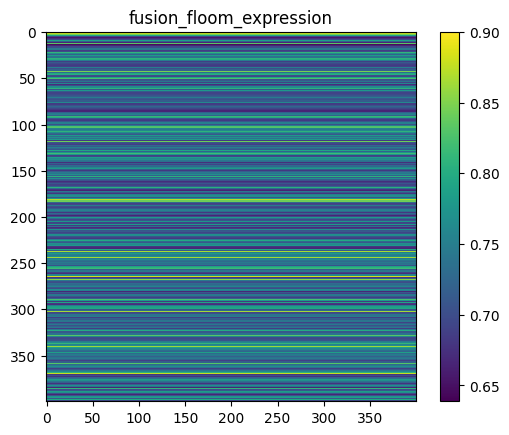

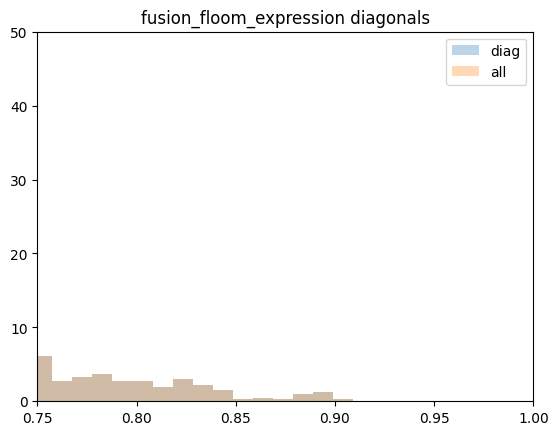

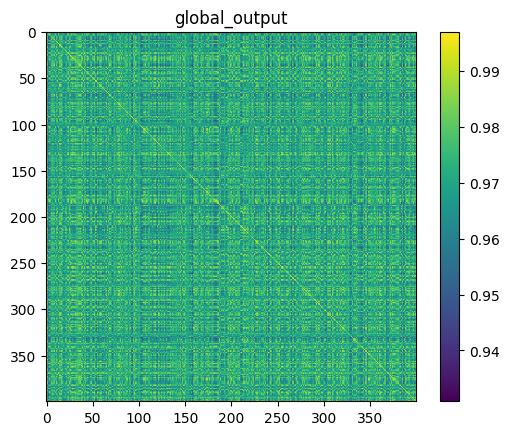

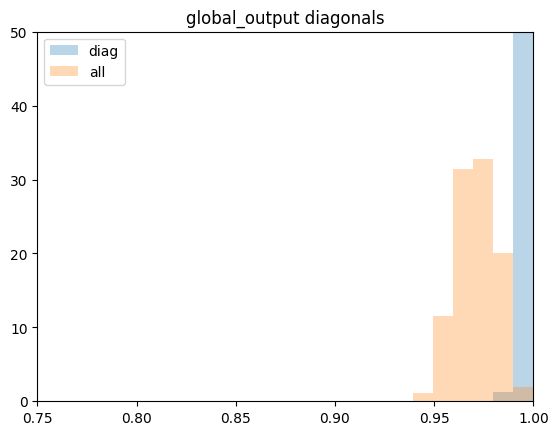

In [60]:
plot_cosines(output, output_zero) #, vmin=0.99)

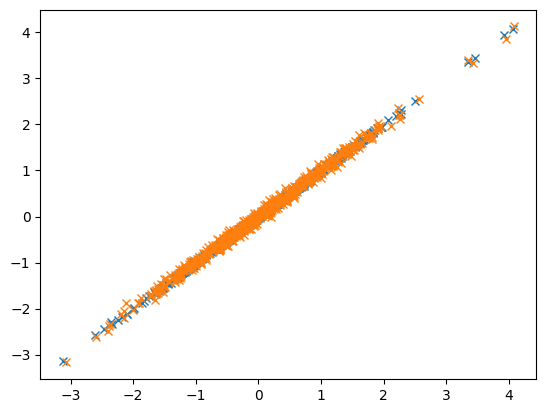

In [118]:
import matplotlib.pyplot as plt
plt.plot(output.spliced[0].T, output2.spliced[0].T,'x')
plt.plot(output.spliced[1].T, output2.spliced[3].T,'x')

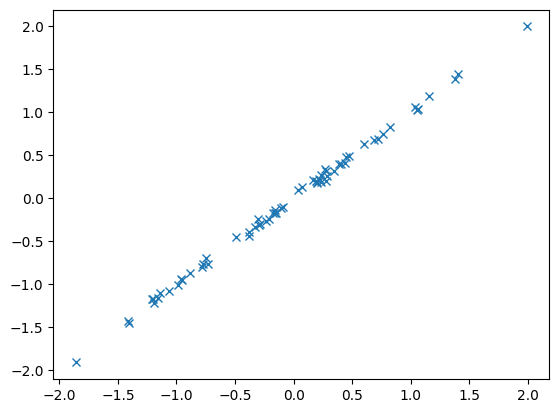

In [35]:
plt.plot(output.expression[0].T, output2.expression[0].T,'x')

In [97]:
output

BioZorroPretrainingLossOutput(losses=BioZorroPretrainingLossesCollection(contrastive_loss_spliced_unspliced=tensor(0.4164), contrastive_loss_spliced_expression=tensor(0.4097), contrastive_loss_unspliced_expression=tensor(0.4155), fusion_loss_spliced=tensor(0.4160), fusion_loss_unspliced=tensor(0.4218), fusion_loss_expression=tensor(0.4208)), spliced=tensor([[-1.1495, -1.1352, -0.2678,  ..., -1.6399,  1.2685, -1.6200],
        [-1.1184, -1.1473, -0.2358,  ..., -1.6374,  1.3286, -1.6621],
        [-1.1103, -1.1614, -0.2176,  ..., -1.6670,  1.3458, -1.6997],
        [-1.1442, -1.1956, -0.2705,  ..., -1.7048,  1.3194, -1.6719]]), unspliced=tensor([[-0.5714, -0.6153, -0.6491,  ...,  0.5839,  1.0429, -1.6685],
        [-0.5403, -0.6274, -0.6171,  ...,  0.5865,  1.1030, -1.7106],
        [-0.5323, -0.6415, -0.5989,  ...,  0.5568,  1.1202, -1.7482],
        [-0.5661, -0.6758, -0.6517,  ...,  0.5191,  1.0937, -1.7204]]), expression=tensor([[-1.1063, -0.1184, -0.6933,  ...,  0.0146,  0.0636,  0.

# Attention masking tests

In [116]:
import torch
token_types = torch.tensor(list((
    *((0,) * 1024),
    *((1,) * 1024),
    *((2,) * 1024),
    *((3,) * 1024),
)), dtype=torch.long)

In [117]:
token_types.shape

torch.Size([4096])

In [118]:
from einops import rearrange, repeat

In [119]:
token_types_attend_from = rearrange(token_types, 'i -> i 1')
token_types_attend_to = rearrange(token_types, 'j -> 1 j')

In [120]:
zorro_mask = token_types_attend_from == token_types_attend_to

In [121]:
zorro_mask = zorro_mask | (token_types_attend_from == 3)

0
-1024:-769
1
-768:-513
2
-512:-257
3
-256:-1


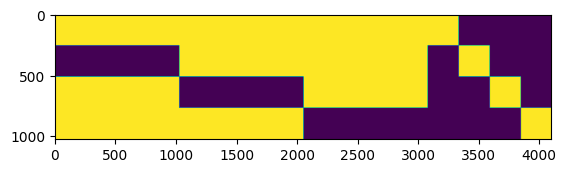

In [189]:
token_types
floom_mask = [token_types != i for i in range(-1,3)]
for idx, tokens in enumerate(floom_mask):
    print(idx)
    a = -256*4 + 256*idx
    b = -256*4 + 256*(idx+1)-1
    print(f"{a}:{b}")
    tokens[-256*4:] = False
    tokens[a:b]= True
floom_mask = repeat(floom_mask, 'i j -> (i i2) j', i2=256)
plt.imshow(floom_mask)#, aspect = 1000)

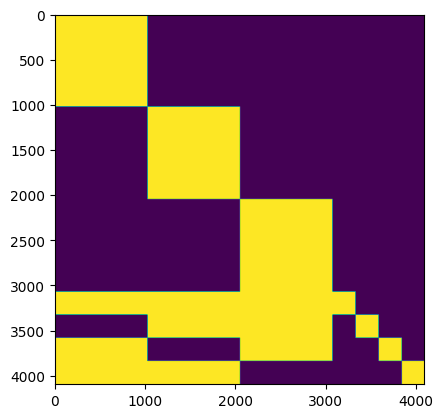

In [190]:
import matplotlib.pyplot as plt
zorro_mask[token_types == 3] = floom_mask
plt.imshow(zorro_mask)

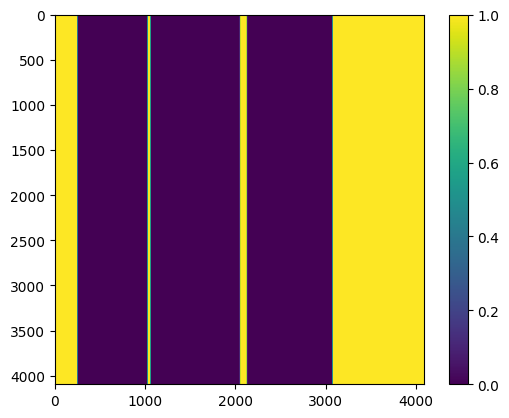

In [125]:
from einops import pack,repeat
padding, ps = pack((
    batch['expression_index'] != 0,
    batch['spliced_index'] != 0,
    batch['unspliced_index'] != 0,
    torch.ones(4,1024),
   #Also need fusion tokens here torch.tensor((True,) * 16),
    ), 'b *')
attn_mask = repeat(padding, 'b j -> b i j', i=token_types.shape[-1])
plt.imshow(attn_mask[0].squeeze())
plt.colorbar()

In [126]:
attn_mask.unsqueeze(1).shape

torch.Size([4, 1, 4096, 4096])

/tmp/ipykernel_914643/776592073.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


[Text(0, -500.0, '0'),
 Text(0, 0.0, 'Modality 1'),
 Text(0, 500.0, 'Modality 2'),
 Text(0, 1000.0, 'Modality 3'),
 Text(0, 1500.0, 'Fusion -1'),
 Text(0, 2000.0, 'Fusion 0'),
 Text(0, 2500.0, 'Fusion 1'),
 Text(0, 3000.0, 'Fusion 2'),
 Text(0, 3500.0, 'Global Tokens'),
 Text(0, 4000.0, ''),
 Text(0, 4500.0, '')]

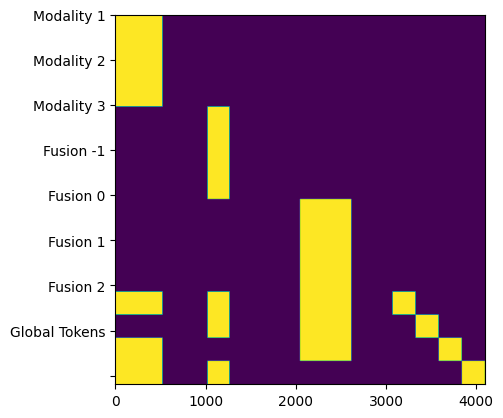

In [191]:
ax = plt.subplot(1,1,1)
im = ax.imshow(attn_mask[3,:,:] * zorro_mask)
labels = ['0','Modality 1','Modality 2','Modality 3','Fusion -1', 'Fusion 0', 'Fusion 1', 'Fusion 2','Global Tokens']
ax.set_yticklabels(labels)

In [72]:
torch.empty(0)

tensor([])

In [73]:
batch

{'expression_index': tensor([[  7,  10,  60,  ...,   0,   0,   0],
         [ 18,  49,  53,  ...,   0,   0,   0],
         [  3,  17,  26,  ...,   0,   0,   0],
         [ 60,  67, 136,  ...,   0,   0,   0]]),
 'spliced_index': tensor([[ 10,  60, 204,  ...,   0,   0,   0],
         [ 49, 134, 351,  ...,   0,   0,   0],
         [ 17,  46,  60,  ...,   0,   0,   0],
         [ 60, 183, 191,  ...,   0,   0,   0]]),
 'unspliced_index': tensor([[  7, 103, 238,  ...,   0,   0,   0],
         [ 18,  53, 120,  ...,   0,   0,   0],
         [ 26, 153, 198,  ...,   0,   0,   0],
         [136, 160, 332,  ...,   0,   0,   0]]),
 'expression_data': tensor([[1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.]]),
 'spliced_data': tensor([[1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [1., 2., 1.,  ..., 0., 0., 0.]]),
 'unspl

In [193]:
return_token_types = (0,1,2,3,3,3,3,4)
return_token_types_tensor = torch.tensor(list(return_token_types))
max_return_tokens = len(return_token_types)
dim=512
return_tokens = torch.nn.Parameter(torch.randn(max_return_tokens, dim))
return_tokens = repeat(return_tokens, 'n d -> b n d', b=4)

In [194]:
return_tokens.shape

torch.Size([4, 8, 512])

In [195]:
pool_mask = rearrange(return_token_types_tensor, 'i -> i 1') == token_types_attend_to
pool_mask = pool_mask | (rearrange(return_token_types_tensor, 'i -> i 1') == torch.ones_like(
            token_types_attend_to, dtype=torch.long) * 4)

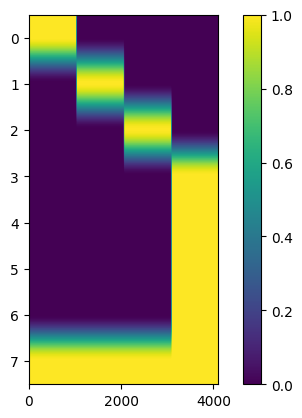

In [196]:
plt.imshow(pool_mask.to(torch.long), aspect=1000) #'auto')
plt.colorbar()

torch.Size([4096])
torch.Size([8, 4096])


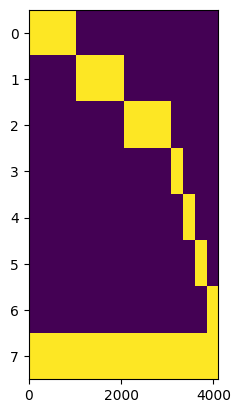

In [197]:
floom_pool_mask = torch.block_diag(torch.ones((1,256)), 
                              torch.ones((1,256)), 
                              torch.ones((1,256)), 
                              torch.ones((1,256)))
print(token_types.shape)
select_mask = (return_token_types_tensor == 3).unsqueeze(1) *(token_types == 3).unsqueeze(0)
print(select_mask.shape)
pool_mask[select_mask] = floom_pool_mask.to(torch.bool).flatten()
#floom_mask = repeat(floom_mask, 'i j -> i j')
ax = plt.subplot(1,1,1)
im = ax.imshow(pool_mask, aspect=1000, interpolation='none')

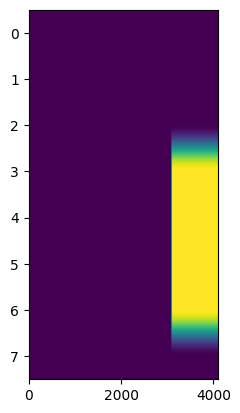

In [170]:
plt.imshow((return_token_types_tensor == 3).unsqueeze(1) *
           (token_types == 3).unsqueeze(0), aspect =1000)

ValueError: only one element tensors can be converted to Python scalars

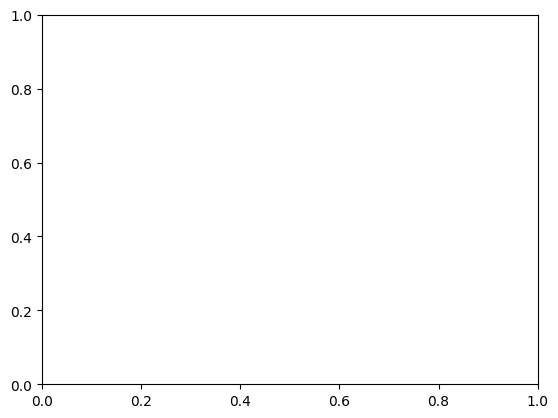

In [179]:
plt.plot(pool_mask.T)

torch.Size([4, 8, 4096])


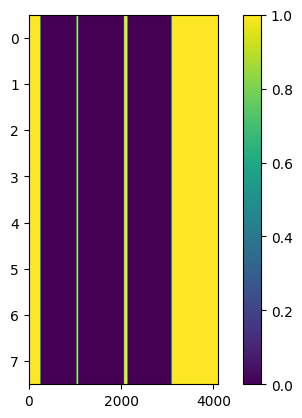

In [180]:
padding_mask = repeat(padding, 'b j -> b i j', i=pool_mask.shape[0])
print(padding_mask.shape)
plt.imshow(padding_mask[0,:,:].squeeze(), aspect=1000)
plt.colorbar()

/tmp/ipykernel_914643/1809391518.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


[Text(0, -1.0, '0'),
 Text(0, 0.0, 'Modality 1'),
 Text(0, 1.0, 'Modality 2'),
 Text(0, 2.0, 'Modality 3'),
 Text(0, 3.0, 'Fusion -1'),
 Text(0, 4.0, 'Fusion 0'),
 Text(0, 5.0, 'Fusion 1'),
 Text(0, 6.0, 'Fusion 2'),
 Text(0, 7.0, 'Global Tokens'),
 Text(0, 8.0, '')]

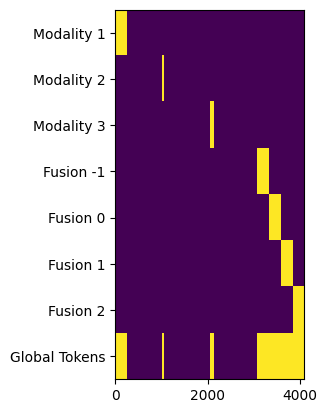

In [198]:
pool_mask = pool_mask * padding_mask
ax = plt.subplot(1,1,1)
im = ax.imshow(pool_mask[0], aspect=1000, interpolation='none')
#labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['0','Modality 1','Modality 2','Modality 3','Fusion -1', 'Fusion 0', 'Fusion 1', 'Fusion 2','Global Tokens']
ax.set_yticklabels(labels)

In [160]:
q=torch.tensor([[1,2],
                [1,1]])
k=torch.tensor([[1,1],
                [2,1]])
v=q

In [163]:
from torch import einsum
sim = einsum('i d, d j -> i j', q, k) #Standard mm multipy
sim = einsum('i d, j d -> i j', q, k) #mm multiply with k transpose
print(sim)
#sim = sim.masked_fill(~attn_mask, -torch.finfo(sim.dtype).max)
#attn = sim.softmax(dim=-1)
attn = sim
out = einsum('i j, j d -> i d', attn, v) #standard multiply with no tranpose
print(out)
### SO COLUMNS SHOULD BE -inf for the mask!

tensor([[3, 4],
        [2, 3]])
tensor([[ 7, 10],
        [ 5,  7]])


In [156]:
sim

tensor([[2, 0],
        [0, 2]])

# Combine datasets

In [85]:
from datasets import concatenate_datasets, load_from_disk
import os
os.environ['HF_DATASETS_CACHE']='/shared/.cache/hugginface/dataset'
datasets = [
   'ad98d3cd-26fb-4ee3-99c9-8a2ab085e737_combined_all',
    'fcaa53cd-ba57-4bfe-af9c-eaa958f95c1a_combined_all',
    'cc95ff89-2e68-4a08-a234-480eca21ce79_combined_all',
    'fde199d2-a841-4ed1-aa65-b9e0af8969b1_combined_all'
]
root = '/shared/'
loaded_datasets=[]
for dataset in datasets:
    loaded_datasets.append(load_from_disk(os.path.join(root,dataset)))
all_datasets=concatenate_datasets(loaded_datasets)

In [88]:
shuffled_dataset = all_datasets.shuffle(seed=42)

In [89]:
len(shuffled_dataset)

2630923

In [91]:
shuffled_dataset.save_to_disk(os.path.join(root,'dataset3M'))

In [29]:
import torch

In [37]:
t = torch.zeros(10)

In [38]:
t[torch.tensor([0,4,9])]=torch.tensor([1,2,3], dtype=torch.float)

In [39]:
t

tensor([1., 0., 0., 0., 2., 0., 0., 0., 0., 3.])